In [21]:
import pandas as pd
import numpy as np

Uploading DATA

In [25]:
data = pd.read_excel(r'C:\Users\Utilisateur\Downloads\example_data_cleaning.xlsx')
print(data.shape)
data

(30, 7)


,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
0,1,34982,2013.000000,12900,Student,78,Low
1,2,34983,2015.000000,1230,barmen,78,High
2,3,34984,1945.000000,3450,student,78,Medium
3,4,34985,1923.000000,5670,manager,78,Low
4,5,34986,1978.000000,7890,hr,78,High
5,6,34987,1967.000000,10110,Manager,78,Medium
6,15,34987,1967.000000,30090,Manager,78,Low
7,22,34987,NaN,18990,sailer,78,High
8,7,34988,NaN,12330,Manager,78,Medium
9,23,34988,1999.000000,25650,Manager,78,Low


Part 2: Analyze your data and create a plan for data preparation


1) check variance
2) check outliers : Amount Max is far from data drop row Birthyyear to check with boxplot 
3) check duplicate 
4) check missing data 
5) else

In [26]:
data.describe()

#variance: Department col seems not interesting to analyze since low variance => drop col
#outliers: 
#- only Amount Max is far away from other data => drop row
#- Birthyyear to check with boxplot if far away

,TransactionID,ClientID,BirthYear,Amount,Department
count,30.000000,30.000000,28.000000,3.000000e+01,30.0
mean,15.500000,34993.833333,1968.316327,1.010097e+05,78.0
std,8.803408,8.132876,27.963867,4.342616e+05,0.0
min,1.000000,34982.000000,1923.000000,1.230000e+03,78.0
25%,8.250000,34987.250000,1944.714286,1.233000e+04,78.0
50%,15.500000,34991.500000,1967.000000,1.899000e+04,78.0
75%,22.750000,34999.750000,1988.000000,2.953500e+04,78.0
max,30.000000,35008.000000,2017.000000,2.399090e+06,78.0


In [30]:
data = data.drop(columns=['Department'])

KeyError: "['Department'] not found in axis"

<AxesSubplot:>

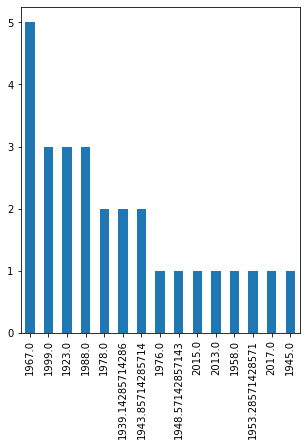

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 6))
data['BirthYear'].value_counts().plot.bar()
#drop row of BirthYear 2017

In [31]:
data = data.drop(data[data['BirthYear'] == 2017].index)
data.shape

(29, 6)

In [32]:
data.duplicated().any()
#no duplicate rows

False

In [33]:
data.isna().sum()

#missing data: 2 in BirthYear, 2 in Profession => check further more for those missing data

TransactionID    0
ClientID         0
BirthYear        2
Amount           0
Profession       2
Risk             0
dtype: int64

In [34]:
#BirthYear: could be imputed by the same ClientID
#Profesison: could be imputed by the same ClientID
data
data.loc[7,'BirthYear'] = 1967
data.loc[8,'BirthYear'] = 1999
data.loc[28,'Profession']='bdm'
data.loc[29,'Profession']='bdm'
data

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk
0,1,34982,2013.000000,12900,Student,Low
1,2,34983,2015.000000,1230,barmen,High
2,3,34984,1945.000000,3450,student,Medium
3,4,34985,1923.000000,5670,manager,Low
4,5,34986,1978.000000,7890,hr,High
5,6,34987,1967.000000,10110,Manager,Medium
6,15,34987,1967.000000,30090,Manager,Low
7,22,34987,1967.000000,18990,sailer,High
8,7,34988,1999.000000,12330,Manager,Medium
9,23,34988,1999.000000,25650,Manager,Low


In [40]:
data['Profession'] = data['Profession'].replace(['student','etudient'],'Student')
data['Profession'] = data['Profession'].replace('manager','Manager')
data['Profession'] = data['Profession'].replace('bdm','BDM')
data['Profession'] = data['Profession'].replace('hr', 'HR')
data

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk
0,1,34982,2013.000000,12900,4,1
1,2,34983,2015.000000,1230,5,0
2,3,34984,1945.000000,3450,14,2
3,4,34985,1923.000000,5670,10,1
4,5,34986,1978.000000,7890,9,0
5,6,34987,1967.000000,10110,3,2
6,15,34987,1967.000000,30090,3,1
7,22,34987,1967.000000,18990,13,0
8,7,34988,1999.000000,12330,3,2
9,23,34988,1999.000000,25650,3,1


In [37]:
#cols Profession, Risk
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

data['Profession']= label.fit_transform(data['Profession'])
data['Risk']= label.fit_transform(data['Risk'])
data

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk
0,1,34982,2013.000000,12900,4,1
1,2,34983,2015.000000,1230,5,0
2,3,34984,1945.000000,3450,14,2
3,4,34985,1923.000000,5670,10,1
4,5,34986,1978.000000,7890,9,0
5,6,34987,1967.000000,10110,3,2
6,15,34987,1967.000000,30090,3,1
7,22,34987,1967.000000,18990,13,0
8,7,34988,1999.000000,12330,3,2
9,23,34988,1999.000000,25650,3,1


In [38]:
#Part 5: Upload the deliverables to GitHub

In [39]:
data.to_csv(r'C:\Users\Utilisateur\Desktop\IronHack\IronMaher\MODULE 1\LAB 32\example_data_cleaned.csv', index=False)